# New Features

In [1]:
import pandas as pd
import csv
from datetime import datetime, timedelta
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df_melt_all = pd.read_csv("data/df_424_melt_all.csv")
df_melt_2class = pd.read_csv("data/df_2class_melt.csv")
df_melt_2class["issuedate"] = pd.to_datetime(df_melt_2class["issuedate"]).dt.date

In [2]:
df_2class = pd.read_csv("data/df_2class_wNF.csv")
df = pd.read_csv("data/basicbib.tab",  sep='\t') # main dataframe with all the patents

df_2class["issuedate"] = pd.to_datetime(df_2class["issuedate"]).dt.date
df["issuedate"] = pd.to_datetime(df["issuedate"]).dt.date

C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df_melt_2class_1990 = df_melt_2class.loc[(df_melt_2class["issuedate"] < date(2000,1,1)) &
                                    (df_melt_2class["issuedate"] >= date(1990,1,1))]

df_1990 = df.loc[(df["issuedate"] < date(2000,1,1)) &
                                    (df["issuedate"] >= date(1990,1,1))]

In [96]:
df_other_all  =  df.loc[((df["class"].values != str(514)) \
                       & (df["class"].values != int(514)) \
                       & (df["class"].values != str(424)) \
                       & (df["class"].values != int(424)))]


In [4]:
def plot_var(dataset, ax, var, l= ["FC3", "FC5", "FC10"], log = True, scatter = False, cat = False, sd_error = False, logx = True, bin_nums = 10):

    if cat == True:
        l = ["FC3_cat", "FC5_cat", "FC10_cat"]
    style = "-"

    for i, FC in enumerate(l):
 
        bins=np.logspace(0,np.log10(max(dataset[var])), bin_nums)
        if logx == False:
            bins=np.linspace(0,max(dataset[var]), bin_nums)
           
        index = np.digitize(dataset[var], bins= bins)
        group = dataset[FC].groupby(index)


        if len(group.mean()) != bin_nums+1:
            mean, std, count = np.zeros(bin_nums + 1), np.zeros(bin_nums+1), np.zeros(bin_nums+1)
            
            mean[group.mean().keys()] = group.mean()
            std[group.std().keys()] = group.std()
            count[group.count().keys()] = group.count()
            
            mean = mean[:-1]
            std = std[:-1]
            count = count[:-1]
        else:
            mean = group.mean()[:-1]
            std = group.std()[:-1]
            count = group.count()[:-1]
        
        error = std / np.sqrt(count-1)
        
        if sd_error == True:
            error = std
            
        ax.errorbar(bins[1:], mean[1:], yerr =  error[1:], fmt = "o", linestyle = style, label = FC, c = "C"+str(i) )

        if scatter  == True:
            ax.scatter(dataset[var], dataset[FC], alpha = 0.1)

    if log == True:
        ax.set_yscale("log")
    
    if logx == True:
        ax.set_xscale("log")
    ax.legend()


## Countries

In [158]:
unique, counts = np.unique(df_2class["st_country"], return_counts=True)

In [159]:
means = []
std = []
for i in unique:
    g = df_2class.loc[df_2class["st_country"] == i]["FC10"]
    means.append(g.mean())
    std.append(g.std())

In [160]:
means = np.asarray(means)
means = means.reshape(-1, 1)

WSS = []
for i in range(1,10):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(means)
    WSS.append(kmeans.inertia_)

C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


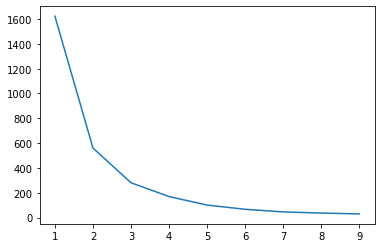

In [161]:
plt.plot(range(1, 10), WSS)

In [162]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(means)

In [163]:
kmeans.labels_, kmeans.cluster_centers_

(array([0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2,
        0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1]),
 array([[ 7.12133146],
        [ 2.56800254],
        [12.16814777]]))

In [164]:
country_class = dict(zip(unique, kmeans.labels_))

In [165]:
df_2class["st_country_class"] = df_2class.replace({"st_country":country_class})["st_country"]

In [166]:

p_m = []
p_std = []
for i in set(df_2class["st_country_class"]):
#     print(i)
    g = df_2class.loc[df_2class["st_country_class"] == i]["FC10"]
    p_m.append(g.mean())
    p_std.append(g.std())


<BarContainer object of 3 artists>

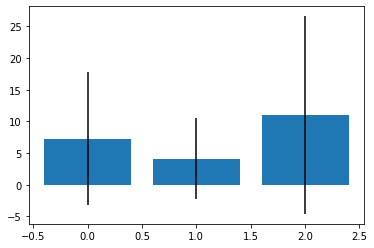

In [167]:
plt.bar([i for i in range(3)], p_m,yerr =  p_std)

In [104]:
df_2class = pd.get_dummies(df_2class, columns = ["st_country_class"])

## Subclasses

In [168]:
unique, counts = np.unique(df_2class["subclass"], return_counts=True)

In [169]:
means = []
std = []
for i in unique:
    g = df_2class.loc[df_2class["subclass"] == i]["FC10"]
    means.append(g.mean())
    std.append(g.std())

In [170]:
means = np.asarray(means)
means = means.reshape(-1, 1)

WSS = []
for i in range(1,10):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(means)
    WSS.append(kmeans.inertia_)

C:\Users\DIEGO UNZUETA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


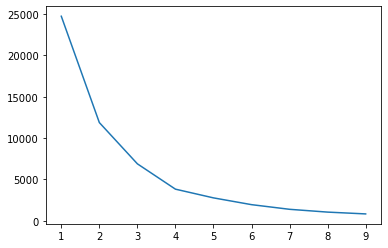

In [171]:
plt.plot(range(1, 10), WSS)

In [172]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(means)

In [173]:
kmeans.labels_, kmeans.cluster_centers_

(array([1, 0, 0, ..., 1, 1, 3]),
 array([[ 6.93944736],
        [ 3.23365309],
        [30.25870678],
        [12.79839612]]))

In [174]:
subclass_class = dict(zip(unique, kmeans.labels_))

In [175]:
df_2class["subclass_class"] = df_2class.replace({"subclass":subclass_class})["subclass"]

In [176]:

p_m = []
p_std = []
for i in set(df_2class["subclass_class"]):
#     print(i)
    g = df_2class.loc[df_2class["subclass_class"] == i]["FC10"]
    p_m.append(g.mean())
    p_std.append(g.std())


<BarContainer object of 4 artists>

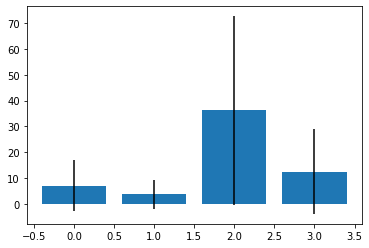

In [177]:
plt.bar([i for i in range(4)], p_m,yerr =  p_std)

In [105]:
df_2class = pd.get_dummies(df_2class, columns = ["subclass_class"])

## Outlinks by assignee

In [178]:
def get_numcitationsall(dataset):
    week_delta = datetime.timedelta(days=7)
    inl_by_assignee_all = np.zeros(len(dataset))
    cap = date.fromisocalendar(1990, 1,1)

    c = 0 #index of each patent (up to len(df_424))

    for week in range(523):

        df_cap = df.loc[df["issuedate"] < cap]
        counts = df_cap.groupby("assignee")["n_bcites"].mean()

        df_week = dataset.loc[dataset["issuedate"] < cap].iloc[c:]

        for assignee in df_week["assignee"]:

            if (assignee in counts) & (assignee != 0):             
                inl_by_assignee_all[c] = counts[assignee]

            elif assignee == 0:
                inl_by_assignee_all[c] = np.nan
            else:
                inl_by_assignee_all[c] = 0

            c += 1

        if week % 50 == 0:
            print(week, "/ 521")

        cap += week_delta
    
    dataset["outl_by_assignee_all"] = inl_by_assignee_all

    return(dataset)

In [10]:
df_2class = get_numcitationsall(df_2class)

In [86]:
def plotting(lable, feature):
    dep = [["FC3", "FC5", "FC10"], ["sliding_window"]]
    ylable = ["In-Links", "Page-Rank"]
    xlable = [lable]
    _, ax = plt.subplots(1, 2, figsize = (10, 5), constrained_layout = True)
    log = [True]  * 6#[False] * 3 + [True] * 3

    for ind_var, var in enumerate(dep):

        plot_var(df_2class, ax[ind_var],feature , bin_nums = 10, l= var,  cat = False, log = False, sd_error = True, logx = True)

        ax[ind_var].set_ylabel(ylable[ind_var])
        ax[ind_var].set_xlabel(xlable[0])
 

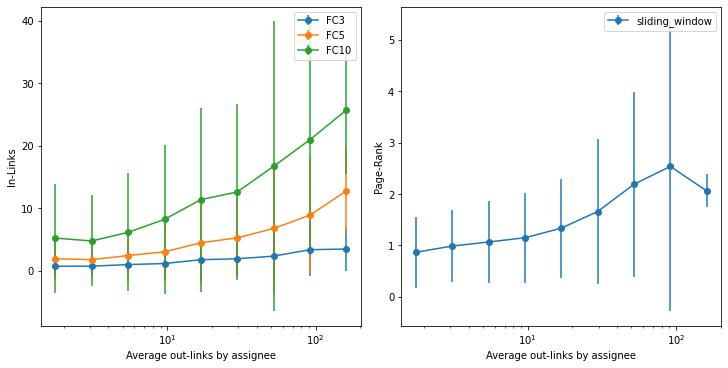

In [87]:
plotting("Average out-links by assignee", "outl_by_assignee_all")

In [82]:
df_2class_all =  df.loc[(df["class"] == 424) | (df["class"] == "424") |\
                        (df["class"] == 514) | (df["class"] == "514")]

In [83]:
def get_inlbyclass(dataset, dataset_all):
    c = 0
    week_delta = datetime.timedelta(days=7)
    inl_by_assignee_424 = []
    cap = date.fromisocalendar(1990, 1,1)
    for week in range(523):

        df_cap = dataset_all.loc[dataset_all["issuedate"] < cap]
        df_week = dataset.loc[dataset["issuedate"] < cap].iloc[c:]

        counts = df_cap.groupby("assignee")["n_bcites"].mean()

        for assignee in df_week["assignee"]:

            if (assignee in counts) & (assignee != 0):
                inl_by_assignee_424.append(counts[assignee])
            elif assignee == 0:
                inl_by_assignee_424.append(np.nan)         
            else:
                inl_by_assignee_424.append(0)

            c += 1

        if week % 50 == 0:
            print(week, "/ 521")
    #         break
        cap += week_delta
        
    dataset["outl_by_assignee_424"] = inl_by_assignee_424
    return(dataset)

In [11]:
df_2class = get_inlbyclass(df_2class, df_2class_all)

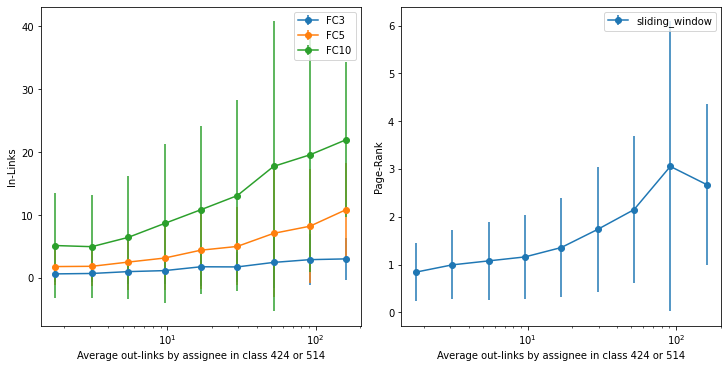

In [88]:
plotting("Average out-links by assignee in class 424 or 514", "outl_by_assignee_424")

In [95]:
def get_inlother(dataset, df_other_all):
    
    df_other  =  df_other_all.loc[(df_other_all["issuedate"] > date(1990, 1,1) )\
                                & (df_other_all["issuedate"] < date(2010,1,1))]

    c = 0
    week_delta = datetime.timedelta(days=7)
    inl_by_assignee_other = []
    cap = date.fromisocalendar(1990, 1,1)
    for week in range(523):

        df_cap = df_other_all.loc[df_other_all["issuedate"] < cap]
        df_week = dataset.loc[dataset["issuedate"] < cap].iloc[c:]

        counts = df_cap.groupby("assignee")["n_fcites"].mean()

        for assignee in df_week["assignee"]:

            if (assignee in counts) & (assignee != 0):
                inl_by_assignee_other.append(counts[assignee])
            elif assignee == 0:
                inl_by_assignee_other.append(np.nan)         
            else:
                inl_by_assignee_other.append(0)

            c += 1

        if week % 50 == 0:
            print(week, "/ 521")
    #         break
        cap += week_delta
        
    dataset["outl_by_assignee_other"] = inl_by_assignee_other
    return(dataset)

In [12]:
df_2class = get_inlother(df_2class, df_other_all)

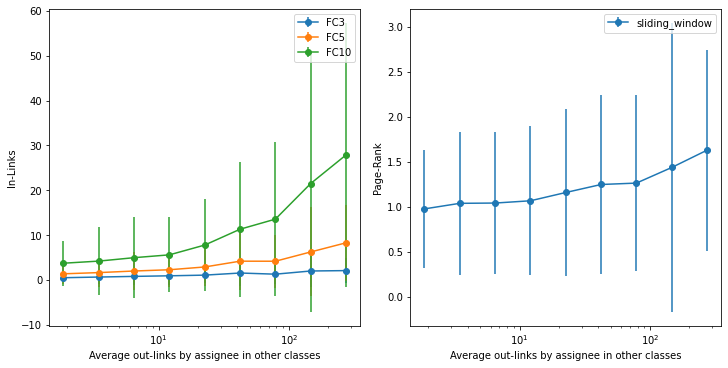

In [99]:
plotting("Average out-links by assignee in other classes", "outl_by_assignee_other")

## In-links of cited patents

In [46]:
def get_Av_IL_Cites(dataset):
    week_delta = datetime.timedelta(days=7)
#     inl_by_assignee_all = np.zeros(len(dataset))
    cap = date.fromisocalendar(1990, 1,1)
    mean_cites = []
    current = 0
    c = 0 #index of each patent (up to len(df_424))

    for week in range(523):

        df_cap = df.loc[df["issuedate"] < cap]
        counts = df_cap.groupby("patent")["n_fcites"].mean()

        df_week = dataset.loc[dataset["issuedate"] < cap].iloc[c:]

        for index, patent in df_week.iterrows():
            
            cites = df_melt_2class_1990[current:current + patent["n_bcites"]]["cited"]

            m = []
            for cited in cites:
                if cited in counts:
                    m.append(counts[cited])
            
            if len(m) > 0:
                mean_cites.append(sum(m)/len(m))
            else:
                mean_cites.append(0)
                
            c += 1

        if week % 50 == 0:
            print(week, "/ 521")

        cap += week_delta
    
    return(mean_cites)

In [13]:
mean_cites = get_Av_IL_Cites(df_2class)

In [48]:
len(mean_cites), df_2class.shape[0] #sanity check

(46264, 46264)

In [69]:
df.loc[df["patent"].isin(df_melt_2class_1990["cited"][:14])]["n_fcites"].mean(), df_2class["inl_by_cited_all"][0] #sanity check

(74.21428571428571, 74.21428571428571)

<ipython-input-4-3b074aee8b1e>:32: RuntimeWarning: invalid value encountered in sqrt
  error = std / np.sqrt(count-1)


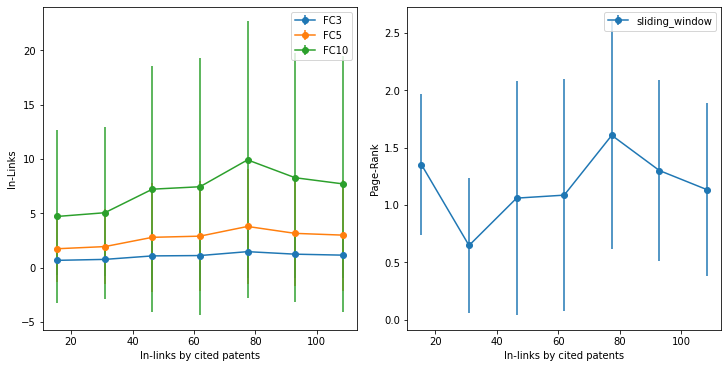

In [9]:
dep = [["FC3", "FC5", "FC10"], ["sliding_window"]]
ylable = ["In-Links", "Page-Rank"]
xlable = ["In-links by cited patents"]
_, ax = plt.subplots(1, 2, figsize = (10, 5), constrained_layout = True)
log = [True]  * 6#[False] * 3 + [True] * 3

for ind_var, var in enumerate(dep):

    plot_var(df_2class, ax[ind_var],"inl_by_cited_all" , bin_nums = 8, l= var,  cat = False, log = False, sd_error = True, logx = False)

    ax[ind_var].set_ylabel(ylable[ind_var])
    ax[ind_var].set_xlabel(xlable[0])
 

## Outlinks by cited patents

In [ ]:
def get_Av_Outl_Cites(dataset):
    week_delta = datetime.timedelta(days=7)
#     inl_by_assignee_all = np.zeros(len(dataset))
    cap = date.fromisocalendar(1990, 1,1)
    mean_cites = []
    current = 0
    c = 0 #index of each patent (up to len(df_424))

    for week in range(523):

        df_cap = df.loc[df["issuedate"] < cap]
        counts = df_cap.groupby("patent")["n_bcites"].mean()

        df_week = dataset.loc[dataset["issuedate"] < cap].iloc[c:]

        for index, patent in df_week.iterrows():
            
            cites = df_melt_2class_1990[current:current + patent["n_bcites"]]["cited"]

            m = []
            for cited in cites:
                if cited in counts:
#                     print(counts[cited])
                    m.append(counts[cited])
            
            if len(m) > 0:
                mean_cites.append(sum(m)/len(m))
            else:
                mean_cites.append(0)
                
            c += 1

        if week % 50 == 0:
            print(week, "/ 521")

        cap += week_delta
    
    dataset["oul_by_cited_all"] = mean_cites
            
#     notify.send('Inl by Assignee ') 
    return(dataset)

In [14]:
df_2class = get_Av_Outl_Cites(df_2class)

<ipython-input-75-3b074aee8b1e>:32: RuntimeWarning: invalid value encountered in sqrt
  error = std / np.sqrt(count-1)


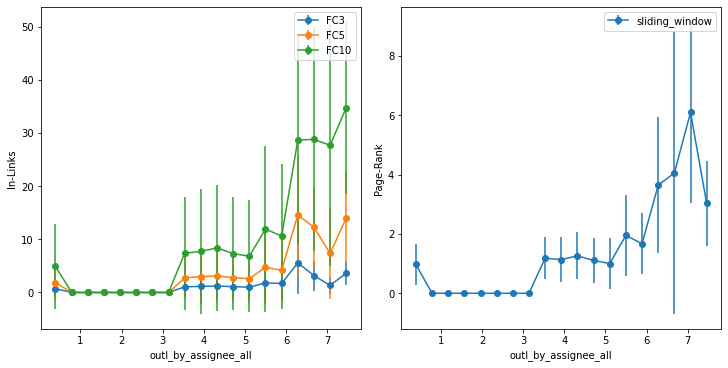

In [81]:
dep = [["FC3", "FC5", "FC10"], ["sliding_window"]]
ylable = ["In-Links", "Page-Rank"]
xlable = ["outl_by_assignee_all"]
_, ax = plt.subplots(1, 2, figsize = (10, 5), constrained_layout = True)
log = [True]  * 6#[False] * 3 + [True] * 3

for ind_var, var in enumerate(dep):

    plot_var(df_2class, ax[ind_var],"oul_by_cited_all" , bin_nums = 20, l= var,  cat = False, log = False, sd_error = True, logx = False)

    ax[ind_var].set_ylabel(ylable[ind_var])
    ax[ind_var].set_xlabel(xlable[0])
 